In [ ]:
import numpy
import pandas
from matplotlib import pyplot
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Placements.csv to Placements.csv


In [ ]:
data=pandas.read_csv('Placements.csv')

In [ ]:
data.head(5)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


In [ ]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

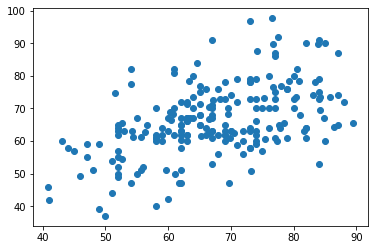

In [ ]:
pyplot.scatter(data['ssc_p'],data['hsc_p'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['ssc_p'],data['hsc_p'], test_size = 0.20, random_state = 0)

In [ ]:
X_train= numpy.array(X_train).reshape(-1, 1)
y_train= numpy.array(y_train).reshape(-1, 1)
X_test= numpy.array(X_test).reshape(-1, 1)
y_test= numpy.array(y_test).reshape(-1, 1)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred=reg.predict(X_test)

In [ ]:
print('coefficients: ',reg.coef_)
print('Intercept: ',reg.intercept_)

coefficients:  [[0.52419157]]
Intercept:  [31.2715688]


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error: ',mean_squared_error(y_test,ypred))
print('R2 score: ',r2_score(y_test,ypred))

Mean squared error:  55.77751471849925
R2 score:  0.38495266263094374


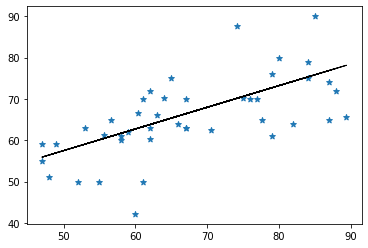

In [ ]:
pyplot.scatter(X_test,y_test,marker='*')
pyplot.plot(X_test,ypred,color='black',linewidth=1)
pyplot.show()


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def extract(text):
  punctuations = [char for char in text if char not in string.punctuation]
  punctuations = ''.join(punctuations)
  clean_words = [word for word in punctuations.split() if word.lower() not in stopwords.words('english')]
  return clean_words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
degree=CountVectorizer(analyzer=extract).fit_transform(data['specialisation'])

In [ ]:
degree

<215x3 sparse matrix of type '<class 'numpy.int64'>'
	with 215 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(degree,data['status'], test_size = 0.20, random_state = 1)

In [ ]:
from sklearn import linear_model
log_reg=linear_model.LogisticRegression(C=1000,class_weight='balanced')
log_reg.fit(X_train,y_train)

LogisticRegression(C=1000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
pred=log_reg.predict(X_train)
print(classification_report(y_train,pred,zero_division=1))

              precision    recall  f1-score   support

  Not Placed       0.50      0.08      0.13        52
      Placed       0.71      0.97      0.82       120

    accuracy                           0.70       172
   macro avg       0.60      0.52      0.48       172
weighted avg       0.64      0.70      0.61       172



In [ ]:
from sklearn.metrics import classification_report,accuracy_score
ypred=log_reg.predict(X_test)
print(classification_report(y_test,ypred,zero_division=1))

              precision    recall  f1-score   support

  Not Placed       0.67      0.13      0.22        15
      Placed       0.68      0.96      0.79        28

    accuracy                           0.67        43
   macro avg       0.67      0.55      0.51        43
weighted avg       0.67      0.67      0.59        43



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(degree,data['status'], test_size = 0.25, random_state = 1)

In [ ]:
from sklearn import svm
regr=svm.SVC(C=10,class_weight='balanced',kernel='sigmoid',coef0=1)
regr.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
regr.predict(X_test)

array(['Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
ypred=regr.predict(X_test)
print(classification_report(y_test,ypred,zero_division=1))
print(accuracy_score)

              precision    recall  f1-score   support

  Not Placed       0.67      0.12      0.20        17
      Placed       0.71      0.97      0.82        37

    accuracy                           0.70        54
   macro avg       0.69      0.55      0.51        54
weighted avg       0.69      0.70      0.62        54

<function accuracy_score at 0x7f8a346d0598>
